In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
#import logistic_regression as lg

train_df = pd.read_csv('/content/gdrive/My Drive/Hackathons/Data Storm 1.0/data-storm-10/credit_card_default_train.csv')
test_df = pd.read_csv('/content/gdrive/My Drive/Hackathons/Data Storm 1.0/data-storm-10/credit_card_default_test.csv')

In [0]:
# replacing balance limit v1
train_df['Balance_Limit_V1'] = train_df['Balance_Limit_V1'].replace('2.5M', 1)
train_df['Balance_Limit_V1'] = train_df['Balance_Limit_V1'].replace('1.5M', 0.6)
train_df['Balance_Limit_V1'] = train_df['Balance_Limit_V1'].replace('1M', 0.4)
train_df['Balance_Limit_V1'] = train_df['Balance_Limit_V1'].replace(' 500K', 0.2)
train_df['Balance_Limit_V1'] = train_df['Balance_Limit_V1'].replace('400K', 0.16)
train_df['Balance_Limit_V1'] = train_df['Balance_Limit_V1'].replace('300K', 0.12)
train_df['Balance_Limit_V1'] = train_df['Balance_Limit_V1'].replace('200K', 0.08)
train_df['Balance_Limit_V1'] = train_df['Balance_Limit_V1'].replace('100K', 0.04)
test_df['Balance_Limit_V1'] = test_df['Balance_Limit_V1'].replace('2.5M', 1)
test_df['Balance_Limit_V1'] = test_df['Balance_Limit_V1'].replace('1.5M', 0.6)
test_df['Balance_Limit_V1'] = test_df['Balance_Limit_V1'].replace('1M', 0.4)
test_df['Balance_Limit_V1'] = test_df['Balance_Limit_V1'].replace(' 500K', 0.2)
test_df['Balance_Limit_V1'] = test_df['Balance_Limit_V1'].replace('400K', 0.16)
test_df['Balance_Limit_V1'] = test_df['Balance_Limit_V1'].replace('300K', 0.12)
test_df['Balance_Limit_V1'] = test_df['Balance_Limit_V1'].replace('200K', 0.08)
test_df['Balance_Limit_V1'] = test_df['Balance_Limit_V1'].replace('100K', 0.04)

# replacing gender
train_df['Gender'] = train_df['Gender'].replace('M', 1)
train_df['Gender'] = train_df['Gender'].replace('F', -1)
test_df['Gender'] = test_df['Gender'].replace('M', 1)
test_df['Gender'] = test_df['Gender'].replace('F', -1)

# replacing educational status
train_df['EDUCATION_STATUS'] = train_df['EDUCATION_STATUS'].replace('Graduate', 1)
train_df['EDUCATION_STATUS'] = train_df['EDUCATION_STATUS'].replace('High School', 2)
train_df['EDUCATION_STATUS'] = train_df['EDUCATION_STATUS'].replace('Other', 3)
test_df['EDUCATION_STATUS'] = test_df['EDUCATION_STATUS'].replace('Graduate', 1)
test_df['EDUCATION_STATUS'] = test_df['EDUCATION_STATUS'].replace('High School', 2)
test_df['EDUCATION_STATUS'] = test_df['EDUCATION_STATUS'].replace('Other', 3)

# replacing marital status
train_df['MARITAL_STATUS'] = train_df['MARITAL_STATUS'].replace('Single', 0)
train_df['MARITAL_STATUS'] = train_df['MARITAL_STATUS'].replace('Other', 1)
test_df['MARITAL_STATUS'] = test_df['MARITAL_STATUS'].replace('Single', 0)
test_df['MARITAL_STATUS'] = test_df['MARITAL_STATUS'].replace('Other', 1)

# replacing age
train_df['AGE'] = train_df['AGE'].replace('Less than 30', 0.25)
train_df['AGE'] = train_df['AGE'].replace('31-45', 0.5)
train_df['AGE'] = train_df['AGE'].replace('46-65', 0.75)
train_df['AGE'] = train_df['AGE'].replace('More than 65', 1)
test_df['AGE'] = test_df['AGE'].replace('Less than 30', 0.25)
test_df['AGE'] = test_df['AGE'].replace('31-45', 0.5)
test_df['AGE'] = test_df['AGE'].replace('46-65', 0.75)
test_df['AGE'] = test_df['AGE'].replace('More than 65', 1)

# replacing due amount
train_df['DUE_AMT_JULY'] = train_df['DUE_AMT_JULY']/100000
train_df['DUE_AMT_AUG'] = train_df['DUE_AMT_AUG']/100000
train_df['DUE_AMT_SEP'] = train_df['DUE_AMT_SEP']/100000
train_df['DUE_AMT_OCT'] = train_df['DUE_AMT_OCT']/100000
train_df['DUE_AMT_NOV'] = train_df['DUE_AMT_NOV']/100000
train_df['DUE_AMT_DEC'] = train_df['DUE_AMT_DEC']/100000
test_df['DUE_AMT_JULY'] = test_df['DUE_AMT_JULY']/100000
test_df['DUE_AMT_AUG'] = test_df['DUE_AMT_AUG']/100000
test_df['DUE_AMT_SEP'] = test_df['DUE_AMT_SEP']/100000
test_df['DUE_AMT_OCT'] = test_df['DUE_AMT_OCT']/100000
test_df['DUE_AMT_NOV'] = test_df['DUE_AMT_NOV']/100000
test_df['DUE_AMT_DEC'] = test_df['DUE_AMT_DEC']/100000

# replacing paid amount
train_df['PAID_AMT_JULY'] = train_df['PAID_AMT_JULY']/12500
train_df['PAID_AMT_AUG'] = train_df['PAID_AMT_AUG']/12500
train_df['PAID_AMT_SEP'] = train_df['PAID_AMT_SEP']/12500
train_df['PAID_AMT_OCT'] = train_df['PAID_AMT_OCT']/12500
train_df['PAID_AMT_NOV'] = train_df['PAID_AMT_NOV']/12500
train_df['PAID_AMT_DEC'] = train_df['PAID_AMT_DEC']/12500
test_df['PAID_AMT_JULY'] = test_df['PAID_AMT_JULY']/12500
test_df['PAID_AMT_AUG'] = test_df['PAID_AMT_AUG']/12500
test_df['PAID_AMT_SEP'] = test_df['PAID_AMT_SEP']/12500
test_df['PAID_AMT_OCT'] = test_df['PAID_AMT_OCT']/12500
test_df['PAID_AMT_NOV'] = test_df['PAID_AMT_NOV']/12500
test_df['PAID_AMT_DEC'] = test_df['PAID_AMT_DEC']/12500


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
train_df.columns
train_df.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
0,A2,0.40,1,1,1,0.50,-1,-1,-1,-1,-1,-1,0.03248,0.03389,0.06004,0.39418,1.62772,-0.13982,0.27496,0.48032,3.15344,13.02176,0.00000,43.05320,0
1,A3,0.40,-1,2,1,0.25,0,-1,-1,-1,-1,0,3.53351,1.51818,0.26948,0.43530,0.80811,1.24590,12.14544,3.69600,3.48240,6.46488,0.07536,2.69328,0
2,A4,0.04,-1,2,0,0.50,4,3,2,2,-2,-2,0.16681,0.16082,0.15477,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1
3,A5,0.08,-1,1,0,0.50,2,0,0,0,0,0,0.90457,0.92848,0.95193,0.97309,1.00353,1.02740,0.30840,0.31120,0.29568,0.36960,0.32392,0.31344,1
4,A6,0.40,-1,1,1,0.50,2,2,0,0,0,0,4.29556,4.19466,4.29785,4.35354,4.45271,4.53899,0.00000,1.66320,1.29360,1.38600,1.31208,1.38600,0


In [0]:
output = 'NEXT_MONTH_DEFAULT'

cols = [ f for f in train_df.columns if train_df.dtypes[ f ] != "object"]
cols = [ f for f in train_df.columns]
cols.remove( "Client_ID")
cols.remove( output )

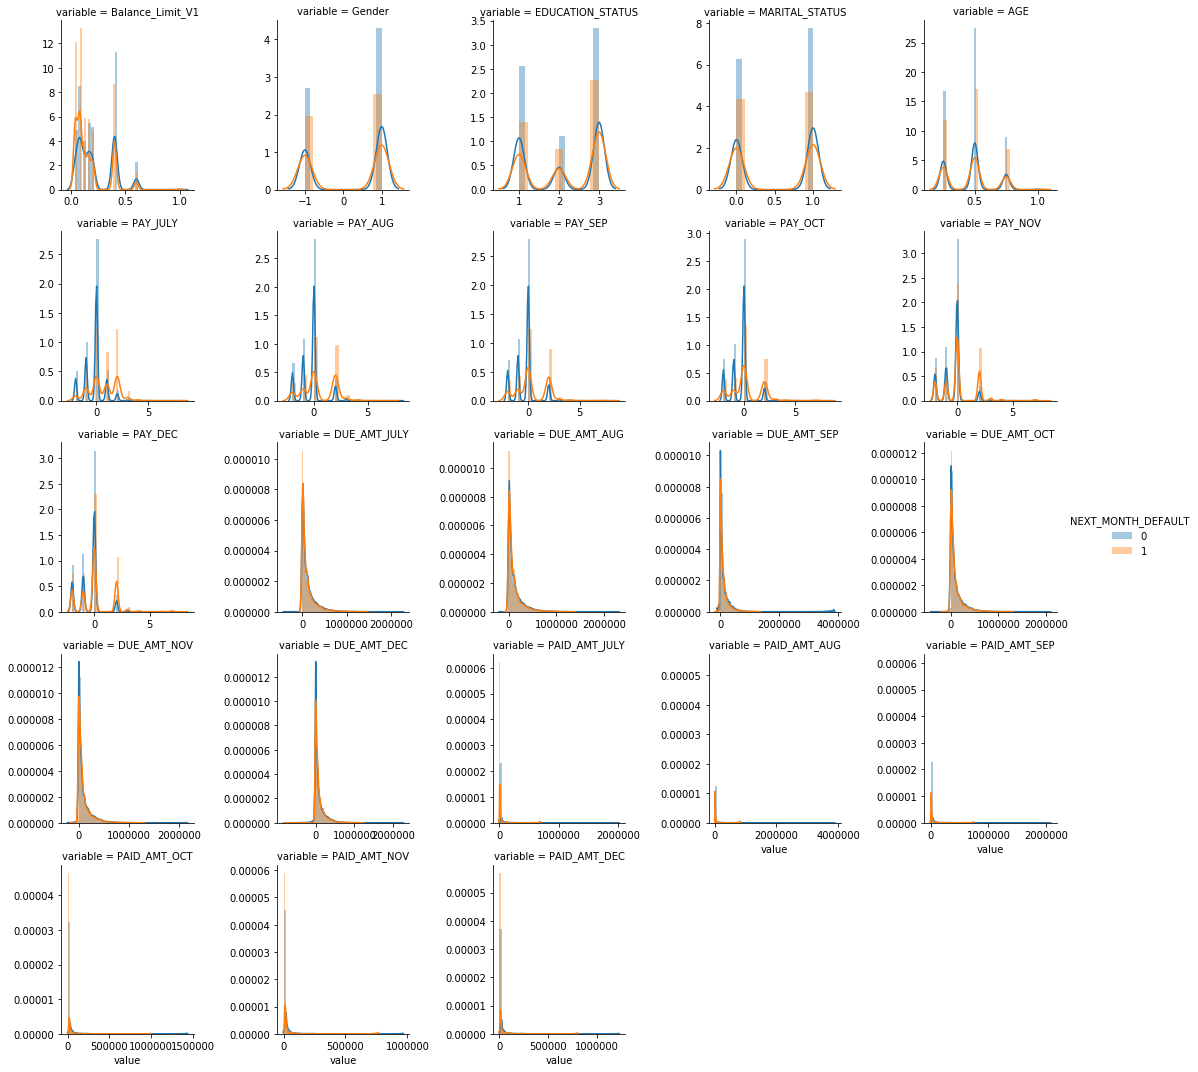

In [6]:
f = pd.melt( train_df, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

In [0]:
# The quantitative vars:
quant = ["Balance_Limit_V1", "AGE"]

# The qualitative but "Encoded" variables (ie most of them)
qual_Enc = cols
qual_Enc.remove("Balance_Limit_V1")
qual_Enc.remove("AGE")

In [0]:
logged = []
months = ["JULY","AUG","SEP","OCT","NOV","DEC"]
for i in range(0,6):
    qual_Enc.remove("PAY_" + months[i])
    train_df[ "log_PAY_" + months[i]]  = train_df["PAY_"  + months[i]].apply( lambda x: np.log1p(x) if (x>0) else 0 )
    test_df[ "log_PAY_" + months[i]]  = test_df["PAY_"  + months[i]].apply( lambda x: np.log1p(x) if (x>0) else 0 )
    logged.append("log_PAY_" + months[i] )

In [0]:
for i in range(0,6):
    qual_Enc.remove("DUE_AMT_" + months[i])
    train_df[ "log_DUE_AMT_" + months[i]] = train_df["DUE_AMT_" + months[i]].apply( lambda x: np.log1p(x) if (x>0) else 0 )
    test_df[ "log_DUE_AMT_" + months[i]] = test_df["DUE_AMT_" + months[i]].apply( lambda x: np.log1p(x) if (x>0) else 0 )
    logged.append("log_DUE_AMT_" + months[i] )

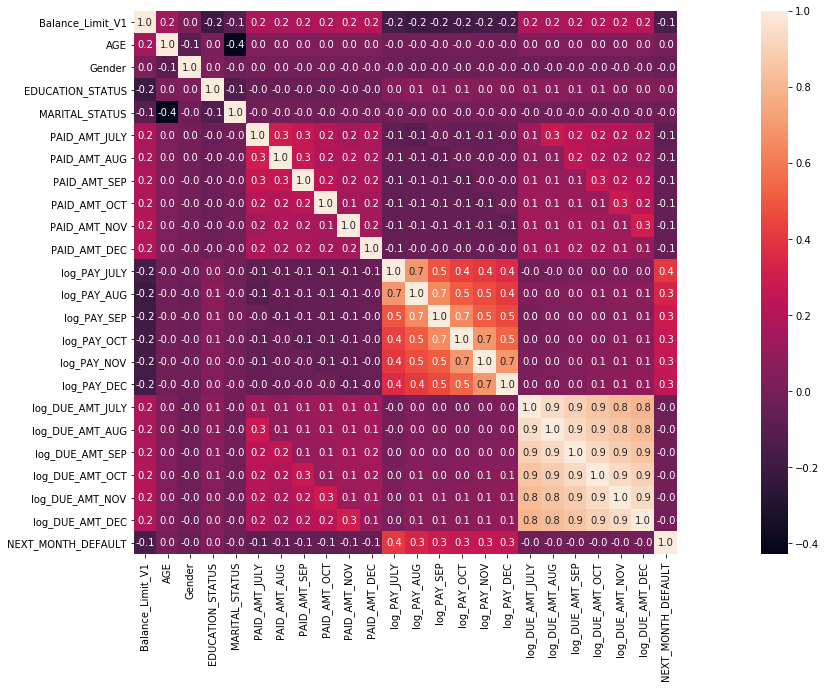

In [27]:
features = quant + qual_Enc + logged + [output]
corr = train_df[features].corr()
plt.subplots(figsize=(30,10))
sns.heatmap( corr, square=True, annot=True, fmt=".1f" )  

In [0]:
# import numpy as np
# features = quant + qual_Enc + logged   
features = logged 
X = train_df[features].values    
y = train_df[ output ].values
submit_test = test_df[features].values 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
X_train = scX.fit_transform( X_train )
X_test = scX.transform( X_test )
submit_test = scX.transform( submit_test )


In [29]:

#Finding the best estimators for our RandomForestClassifier
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy']}

grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, scoring= 'accuracy')

grid_forest.fit(X_train, y_train)

print(grid_forest.best_estimator_)

print(np.abs(grid_forest.best_score_))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.8217708333333335


In [31]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_submit = clf.predict( submit_test )

acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.81


In [0]:
fo = open('/content/gdrive/My Drive/Hackathons/Data Storm 1.0/Lahiru_Solution/random_forest_results_new.csv', 'w')
for x in np.nditer(y_pred_submit):
    fo.write(str(x))
    fo.write('\n')
fo.close()